In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/car_data.csv')

In [5]:
data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [6]:
data.tail()

,User ID,Gender,Age,AnnualSalary,Purchased
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1
999,687,Female,44,73500,0


In [7]:
data.shape

(1000, 5)

In [8]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 1000
Number of Columns 5


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [10]:
data.isnull().sum()

,0
User ID,0
Gender,0
Age,0
AnnualSalary,0
Purchased,0


In [11]:
data.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [12]:
data.head(1)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0


In [48]:
data['Purchased'].value_counts()

,count
Purchased,
0,598
1,402


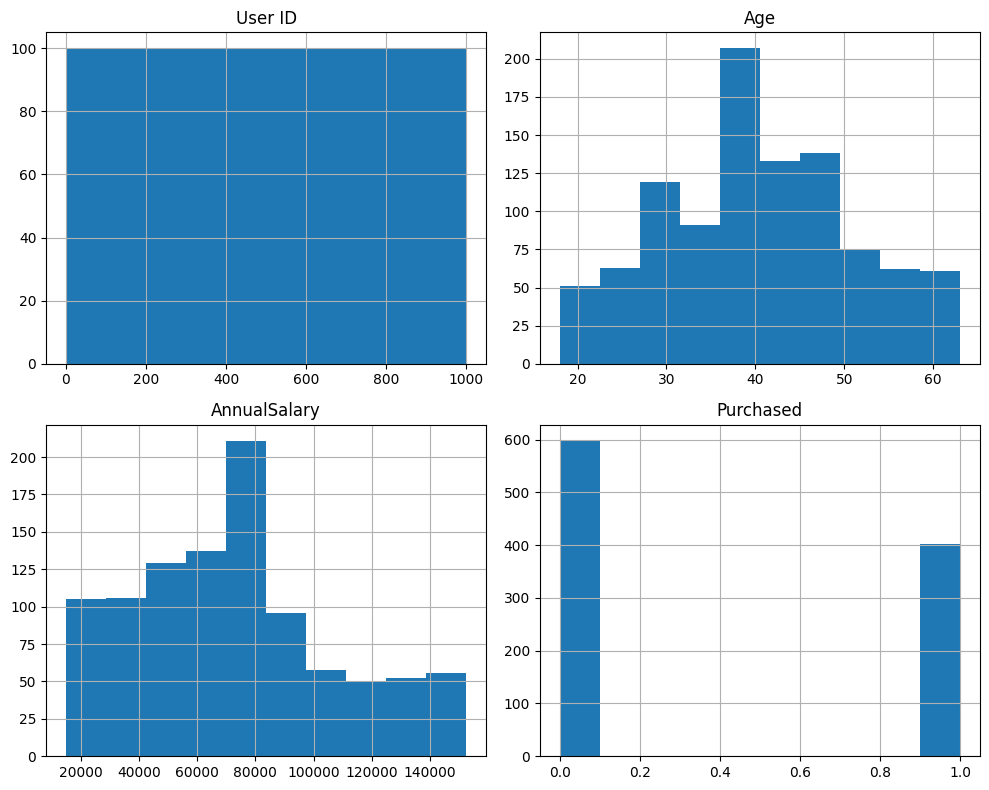

In [14]:
import matplotlib.pyplot as plt

data.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

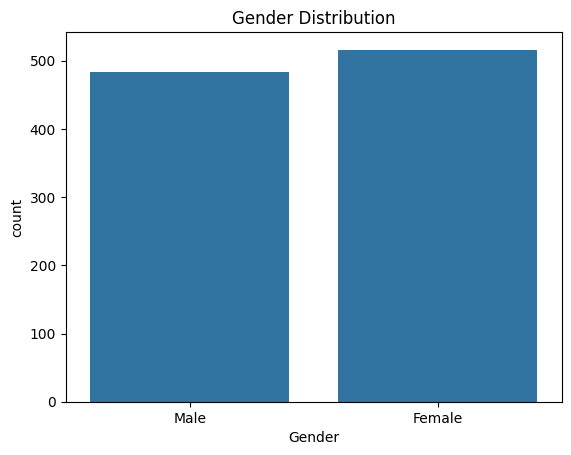

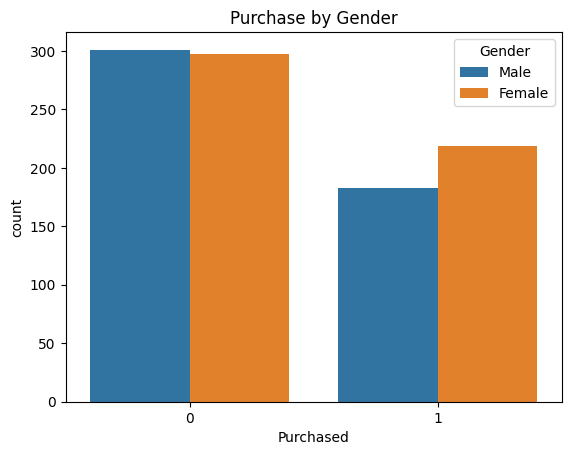

In [15]:
import seaborn as sns

sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()

sns.countplot(x='Purchased', hue='Gender', data=data)
plt.title('Purchase by Gender')
plt.show()


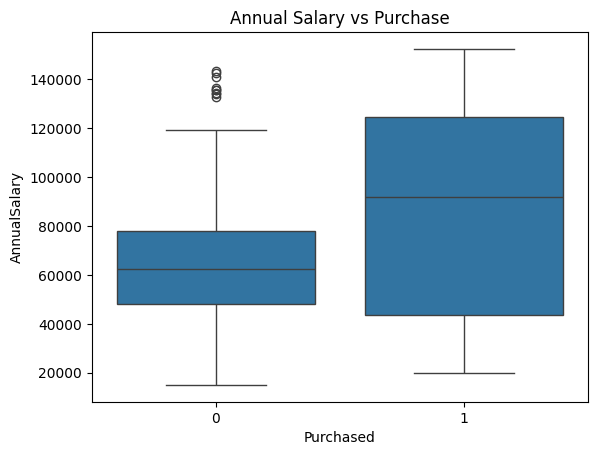

In [17]:
#Relationship Between Salary & Purchase
sns.boxplot(x='Purchased', y='AnnualSalary', data=data)
plt.title('Annual Salary vs Purchase')
plt.show()

In [ ]:
#Higher salary individuals might be more likely to purchase the car

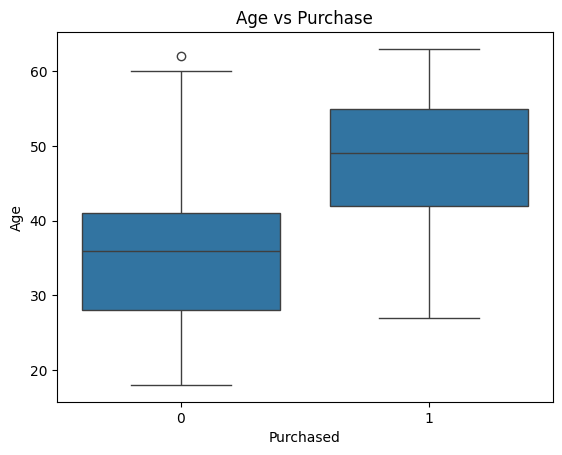

In [19]:
#Age vs Purchase
sns.boxplot(x='Purchased', y='Age', data=data)
plt.title('Age vs Purchase')
plt.show()

In [20]:
#See if there's an age group that tends to buy cars more frequently.

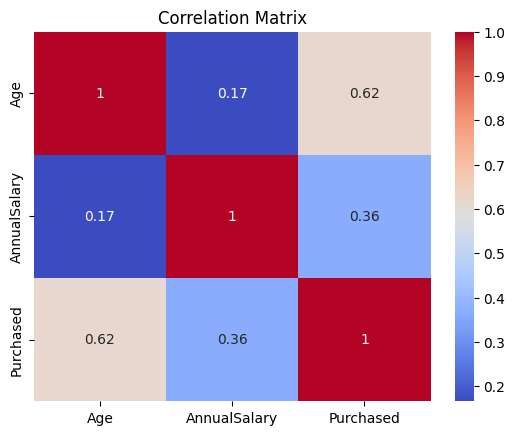

In [22]:
sns.heatmap(data[['Age', 'AnnualSalary', 'Purchased']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [24]:
print(data.groupby('Purchased')[['Age', 'AnnualSalary']].mean())

                 Age  AnnualSalary
Purchased                         
0          34.700669  62373.745819
1          48.146766  88033.582090


In [25]:
# Purchased = 0 : يمثل الأشخاص الذين لم يشتروا السيارة .
# متوسط أعمارهم حوالي 34.7 سنة .
# متوسط راتبهم السنوي حوالي 62,374 دولار .
# Purchased = 1 : يمثل الأشخاص الذين اشتروا السيارة .
# متوسط أعمارهم أعلى، حوالي 48.15 سنة .
# متوسط راتبهم السنوي أعلى أيضًا، حوالي 88,033 دولار .
# الاستنتاج البسيط من هذا الجدول:
# الأشخاص الأكبر سنًا وذوو الدخل الأعلى كانوا أكثر احتمالًا لشراء السيارة.
# هذا قد يكون مؤشرًا على أن العمر والراتب السنوي هما متغيران مهمان في التنبؤ بشراء السيارة.
# كيف تستخدم هذا في EDA؟

In [28]:
print(pd.crosstab(data['Gender'], data['Purchased']))

Purchased    0    1
Gender             
Female     297  219
Male       301  183


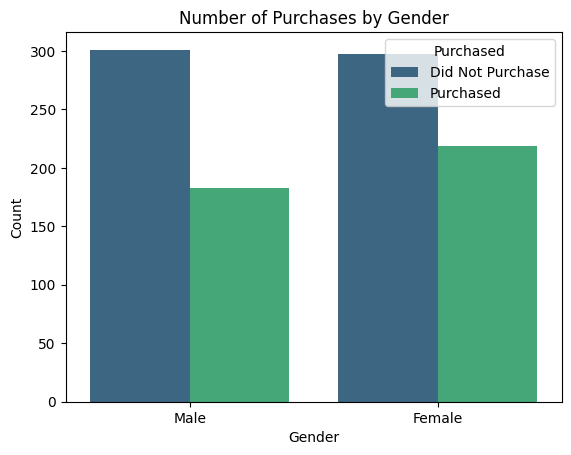

In [32]:
sns.countplot(x='Gender', hue='Purchased', data=data, palette="viridis")
plt.title('Number of Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Purchased', labels=['Did Not Purchase', 'Purchased'])
plt.show()

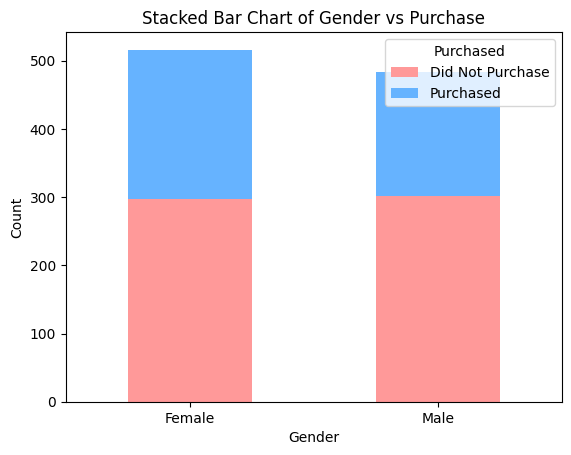

In [34]:
# # إنشاء جدول التكرار (Crosstab)
# gender_purchased = pd.crosstab(index=data['Gender'], columns=data['Purchased'])
# gender_purchased.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'])
# plt.title('Stacked Bar Chart of Gender vs Purchase')
# plt.xlabel('Gender')
# plt.ylabel('Count')
# plt.xticks(rotation=0)
# plt.legend(title='Purchased', labels=['Did Not Purchase', 'Purchased'])
# plt.show()

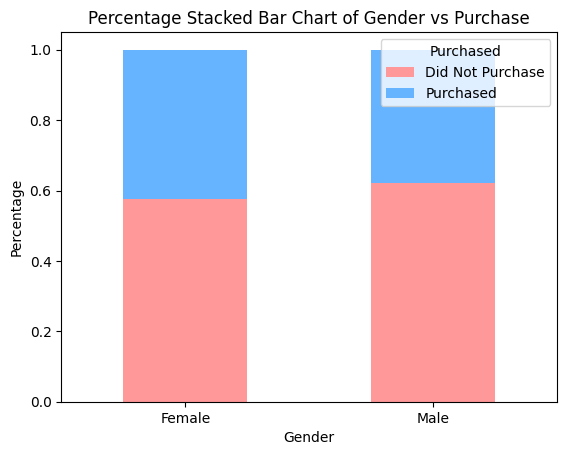

In [36]:
# gender_purchased_percent = gender_purchased.div(gender_purchased.sum(axis=1), axis=0)
# gender_purchased_percent.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'])
# plt.title('Percentage Stacked Bar Chart of Gender vs Purchase')
# plt.xlabel('Gender')
# plt.ylabel('Percentage')
# plt.xticks(rotation=0)
# plt.legend(title='Purchased', labels=['Did Not Purchase', 'Purchased'])
# plt.show()

In [30]:
# جدول تكراري (Crosstab) يوضح العلاقة بين المتغيرين:

# Gender (الجنس): له قيمتان — Female و Male.
# Purchased (شراء السيارة): له قيمتان — 0 (لم يشترِ) و 1 (اشترى).



# من بين جميع الإناث (Female) في البيانات:
# 297 لم تشتري السيارة (Purchased = 0)
# 219 اشترت السيارة (Purchased = 1)
# من بين جميع الذكور (Male) في البيانات:
# 301 لم يشتروا السيارة (Purchased = 0)
# 183 اشتروا السيارة (Purchased = 1)
# تحليل بسيط:
# عدد الإناث والذكور:
# عدد الإناث : 297 + 219 = 516
# عدد الذكور : 301 + 183 = 484
# نسبة الشراء لكل جنس:
# نسبة الإناث اللوات اشتروا السيارة:
# 516 / 219
# ​
#  ≈42.4%
# نسبة الذكور الذين اشتروا السيارة:
# 484 / 183
# ​
#  ≈37.8%
# الاستنتاج:
# نسبة الإناث اللواتي اشتروا السيارة أعلى قليلاً مقارنة بالذكور.
# هذا قد يشير إلى أن الجنس يمكن أن يكون عاملاً مؤثراً في قرار شراء السيارة، لكن التأثير ليس كبيراً.

In [37]:
#Encode Categorical Variables (for later modeling)
df_encoded = pd.get_dummies(data, drop_first=True)

#سيتم تحويل عمود Gender إلى عمود مثل: Gender_Male (1 إذا كان ذكرًا، 0 إن كانت أنثى).

In [39]:
# import pandas as pd

# # مثال على استخدام get_dummies
# data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

In [38]:
df_encoded.head()

,User ID,Age,AnnualSalary,Purchased,Gender_Male
0,385,35,20000,0,True
1,681,40,43500,0,True
2,353,49,74000,0,True
3,895,40,107500,1,True
4,661,25,79000,0,True


In [42]:
X = data[['Age', 'AnnualSalary', 'Gender_Male']]  # المدخلات
y = data['Purchased']                             # المخرجات (الهدف)

In [43]:
from sklearn.model_selection import train_test_split
# test_size=0.2: 20% من البيانات سيتم استخدامها للاختبار.
# random_state=42: لتكرار النتائج.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# الخطوة 4: تطبيع البيانات (اختياري لكن مفيد)
# بعض النماذج (مثل KNN أو Logistic Regression) تستفيد من تطبيع البيانات

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.795
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.93      0.84       112
           1       0.87      0.62      0.73        88

    accuracy                           0.80       200
   macro avg       0.82      0.78      0.78       200
weighted avg       0.81      0.80      0.79       200

Confusion Matrix:
 [[104   8]
 [ 33  55]]


In [ ]:
# # . الدقة (Accuracy): 0.795 أو 79.5%
# # ماذا يعني هذا؟
# # من إجمالي 200 حالة اختبار ، نجح النموذج في تصنيف 79.5% منها بشكل صحيح (سواء كانت 0 أو 1)

# Precision (الدقة)
# من بين الحالات التي تنبأ بأنها تنتمي لفئة معينة، كم منها كان صحيحًا فعلاً؟
# Recall (الاسترجاع)
# من بين جميع الحالات الحقيقية لتلك الفئة، كم منها تم اكتشافها بشكل صحيح؟
# F1-Score
# متوسط توافقي بين Precision و Recall.

In [ ]:
# الفئة 0: لم يشتري العميل السيارة
# Precision = 0.76
# من بين كل العملاء الذين تنبأ النموذج أنهم لن يشتروا السيارة (0) ، 76% منهم كانوا فعلاً لا يشترونها.
# Recall = 0.93
# من بين كل العملاء الذين لم يشتروا السيارة بالفعل (112 شخصًا) ، نجح النموذج في تحديد 93% منهم بشكل صحيح.
# F1-Score = 0.84
# توازن جيد بين precision و recall.
# الفئة 1: العميل اشترى السيارة
# Precision = 0.87
# من بين كل العملاء الذين تنبأ النموذج أنهم سيشتروا السيارة (88 شخصًا)، 87% منهم فعلوا ذلك فعلاً.
# Recall = 0.62 ❗
# من بين جميع العملاء الذين اشتروا السيارة (88 شخصًا)، نجح النموذج في اكتشاف 62% فقط.
# F1-Score = 0.73
# أقل من F1-score للفئة 0، مما يدل على أن النموذج ضعيف قليلاً في التعرف على من يشترون السيارة.

In [ ]:
#  Confusion Matrix - مصفوفة الالتباس
#  الواقع: 0
# True Negative = 104
# False Positive = 8
# الواقع: 1
# False Negative = 33
# True Positive = 55


# ✅ True Positive (TP) = 55 : عدد العملاء الذين اشتروا السيارة وتنبأ النموذج أنهم سيفعلون.
# ✅ True Negative (TN) = 104 : عدد العملاء الذين لم يشتروا السيارة وتنبأ النموذج بذلك.
# ❌ False Positive (FP) = 8 : عدد العملاء الذين لم يشتروا السيارة ولكن النموذج تنبأ أنهم سيفعلون.
# ❌ False Negative (FN) = 33 : عدد العملاء الذين اشتروا السيارة ولكن النموذج تنبأ أنهم لن يفعلوها.

In [47]:
# Accuracy
# (TP + TN) / Total
# (55 + 104)/200 =
# 0.795
# Precision للـ 1
# TP / (TP + FP)
# 55/(55+8) =
# 0.87
# Recall للـ 1
# TP / (TP + FN)
# 55/(55+33) =
# 0.62
# F1-Score للـ 1
# 2 × (P × R)/(P + R)
# ≈
#0.73

In [ ]:
#  النموذج جيد في اكتشاف من
# لن يشتروا السيارة
# (Recall = 0.93)
# 👎 ضعيف نوعًا ما في اكتشاف من
# سيشترون السيارة
# (Recall = 0.62)
# 💡 قد تكون هناك
# مشكلة عدم توازن
# طفيفة في البيانات (عدد
# 0
# و
# 1
# ليس متساويًا تمامًا)
# 📈 يمكن تحسين الأداء باستخدام تقنيات مثل Oversampling, Undersampling, أو استخدام نماذج أفضل

In [51]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# قبل SMOTE
print("Before SMOTE:", Counter(y_train))

# تطبيق SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

# بعد SMOTE
print("After SMOTE:", Counter(y_res))

Before SMOTE: Counter({0: 486, 1: 314})
After SMOTE: Counter({1: 486, 0: 486})


In [52]:
model = LogisticRegression(class_weight='balanced')

In [53]:
model.fit(X_res, y_res)

LogisticRegression(class_weight='balanced')

In [ ]:
# model = LogisticRegression(class_weight={0:1, 1:2})  # أعطِ وزنًا أكبر للفئة 1

In [54]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.785
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       112
           1       0.76      0.74      0.75        88

    accuracy                           0.79       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.79      0.78       200

Confusion Matrix:
 [[92 20]
 [23 65]]


In [55]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       112
           1       0.91      0.85      0.88        88

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.90       200
weighted avg       0.90      0.90      0.90       200



In [56]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=2, eval_metric='logloss')  # مع تعديل وزن الفئة الإيجابية
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       112
           1       0.84      0.86      0.85        88

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



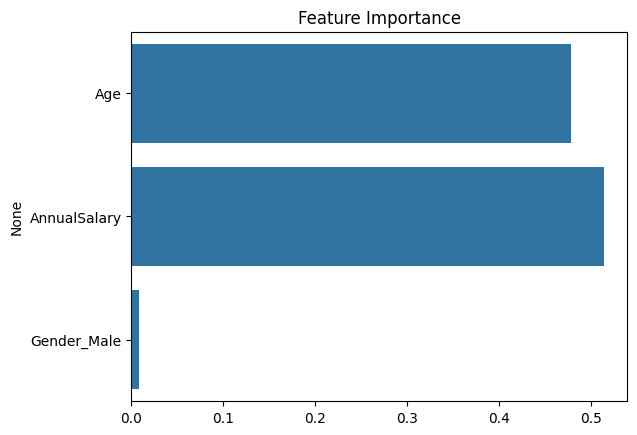

In [57]:
#تحليل أهمية الميزات (Feature Importance)
# فقط لنموذج Random Forest أو XGBoost

#Random Forest
importances = rf.feature_importances_
features = X.columns

sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.show()